# The Battle of the Neighborhoods - Week 1 Part 1

## 1.	Introduction & Business Problem :

### 1.1.	Background

Esports (also known as electronic sports, e-sports, or eSports) is a form of competition using video games. Most commonly, esports takes the form of organized, multiplayer video game competitions, particularly between professional players, individually or as teams. Although organized online and offline competitions have long been a part of video game culture, these were largely between amateurs until the late 2000s, when participation by professional gamers and spectatorship in these events through live streaming saw a large surge in popularity. By the 2010s, esports was a significant factor in the video game industry.

An amusement arcade (often referred to as "video arcade" or simply "arcade") is a venue where people play arcade games such as video games, pinball machines, electro-mechanical games, redemption games, merchandisers (such as claw cranes), or coin-operated billiards or air hockey tables. In some countries, some types of arcades are also legally permitted to provide gambling machines such as slot machines or pachinko machines. Games are usually housed in cabinets.

A startup having plans to setup  eSports and Amusement arcades chain in India. As pilot project they are looking for the best location in India to start their first eSports and Amusement arcade. This information can be used to find the location of interest to setup eSports and Amusement arcades.


### 1.2.	Problem

Data that might contribute to find the place may include cities in Indian states, details of local restaurant, pub, cafe, theater, and many more popular places etc. The stakeholders of startup organization are having trouble to identify the city and location based on population, per capita income of state and nearby venues to select best possible location for pilot project. Also, to use the same information with data to go for future rounds of funding. This project aims to find the best city in India and best place in the city to setup eSports and Amusement arcades.

### 1.3.	Interest

Obviously, Startup firm would be very interested to find the most suitable city and location to have the first eSports and Amusement setup for competitive advantage, growth, returns and business values. Others who are interested in eSports or Amusement arcades may also be interested. 

# The Battle of the Neighborhoods - Week 1 Part 2

In [4]:
# Importing all the necessary libraries we will be needing to do the Ananlysis

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print('Libraries imported.')

Libraries imported.


## 2.	Data Acquisition and Cleaning

### 2.1.	Data Source

The city and state or union territory list can be found in Wikipedia page List of million-plus urban agglomerations in India. The per-capita income for the state or union territory list can be found in Wikipedia page list of Indian states and union territories by GDP per capita. for location data and geographical location coordinates are obtained by leveraging foursquare location data to compare, visualize, explore cities, places of interest, venues and other relevant information. 

https://en.wikipedia.org/wiki/List_of_million-plus_urban_agglomerations_in_India

https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita


In [18]:
# Use Wikipedia page to scrape the page to fetch required data
# Beautiful Soup is a Python library for pulling data out of HTML and XML files
link = 'https://en.wikipedia.org/wiki/List_of_million-plus_urban_agglomerations_in_India'
page = requests.get(link) 
soup = BeautifulSoup(page.text)
table = soup.find_all('table')[0]

In [6]:
table_rows = table.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
df = pd.DataFrame(res, columns=["Rank", "City", "State or Union Teritory", "Population 2011", "Population 2001"])
print (df.shape)
df.head()

(53, 5)


,Rank,City,State or Union Teritory,Population 2011,Population 2001
0,1,Mumbai,Maharashtra,"18,394,912","16,434,386"
1,2,Delhi,Delhi,"16,349,831","12,877,470"
2,3,Kolkata,West Bengal,"14,035,959","13,205,697"
3,4,Chennai,Tamil Nadu,"8,653,521","6,560,242"
4,5,Bangalore,Karnataka,"8,520,435","5,701,446"


In [7]:
# Find Latitude and Longitude for India's Capital Delhi to understand geo coordinates 
from  geopy.geocoders import Nominatim
geolocator = Nominatim()
city = "Delhi"
country ="India"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 28.6517178 
longtitude is:- 77.2219388


In [9]:
# Find Coordinates for each city in the datafrmae 

# geolocater.geocode is used to fetch city Coordinates for each City in dataframe
df['city_coord'] = df['City'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

# City Coordinates were converted to string 
df['city_coord'] = df['city_coord'].astype(str)
df.city_coord = [x.strip('()') for x in df.city_coord]


In [10]:
#Latitude and Longitude details were stored in new dataframe
new = df["city_coord"].str.split(",", n = 1, expand = True)

#update new columns Latitude and Longitude to Original dataframe
df["Latitude"]= new[0]
df["Longitude"]= new[1]

In [13]:
df.head()

,Rank,City,State or Union Teritory,Population 2011,Population 2001,Latitude,Longitude
0,1,Mumbai,Maharashtra,"18,394,912","16,434,386",18.9387711,72.8353355
1,2,Delhi,Delhi,"16,349,831","12,877,470",28.6517178,77.2219388
2,3,Kolkata,West Bengal,"14,035,959","13,205,697",22.5677459,88.3476023
3,4,Chennai,Tamil Nadu,"8,653,521","6,560,242",13.0801721,80.2838331
4,5,Bangalore,Karnataka,"8,520,435","5,701,446",12.9791198,77.5912997


#### Get the List of Indian states and union territories by GDP per capita 

In [17]:
# Beautiful Soup is a Python library for pulling data out of HTML and XML files
link1 = 'https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita'
page1 = requests.get(link1) 
soup1 = BeautifulSoup(page1.text)
table1 = soup1.find_all('table')[1]
table_rows = table1.find_all('tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
df_state = pd.DataFrame(res, columns=["Rank", "State or Union Teritory", "Percapita Income", "Year", "PPP", "COMP"])
df_state.head()

,Rank,State or Union Teritory,Percapita Income,Year,PPP,COMP
0,1,Goa,"₹375,554 (equivalent to ₹390,000 or US$5,500 i...",2016–17[2],"INT$21,218",Bulgaria
1,2,Delhi,"₹329,093 (equivalent to ₹350,000 or US$4,800 i...",2017–18[3],"INT$18,593",Belarus
2,3,Sikkim,"₹297,765 (equivalent to ₹310,000 or US$4,300 i...",2017–18[2],"INT$16,760",China
3,4,Chandigarh,"₹242,386 (equivalent to ₹250,000 or US$3,500 i...",2015–16[4],"INT$13,695",South Africa
4,5,Puducherry,"₹198,156 (equivalent to ₹210,000 or US$2,900 i...",2017–18[2],"INT$11,195",Ecuador


### 2.2.	Data Cleaning

Data scraped from multiple Wikipedia pages. There several problems encountered during scraping pages, First the column name of city was mentioned as UA. This was cleaned by naming the column with heading ‘City’.

Second The population figures of cities in Kerala are inflated as the definition of urban agglomeration was revised in the 2011 census. The population of urban agglomerations in Kerala is not comparable with other cities in the country. However, for Kerala state cities the available information on the Wiki page is used for this project. 

Third there were two population columns with Column names as Population (2011) and Population (2001). By verifying more information, it is found that the population figures of 2011 were latest and are retrieved in 14 December 2014. Hence 2011 Population is considered for the project. The details for the same can be found below. "India: Major Agglomerations". .citypopulation.de. Archived from the original on 17 December 2014. Retrieved 14 December 2014

After fixing these problems it is found that the cities Hyderabad and Visakhapatnam had super imposed numbers which was addressed by dropping those cities from consideration to avoid program error during calculations.

Luckily there were no missing values, but there were unnecessary data such as per capita PPP, Comparable country by GDP per capita which are of no use for the project hence those were cleaned by dropping the respective columns. 


http://www.citypopulation.de/India-Agglo.html

https://web.archive.org/web/20141217011539/http:/citypopulation.de/India-Agglo.html

##### Drop unnecessary columns like Rank, PPP, del3, COMP from the Table we extracted from the webpage that has population and percapita income

In [15]:
df_state.drop(columns = ['Rank','Year', 'PPP', 'COMP'], axis = 1, inplace = True)

In [16]:
df_state.head()

,State or Union Teritory,Percapita Income
0,Goa,"₹375,554 (equivalent to ₹390,000 or US$5,500 i..."
1,Delhi,"₹329,093 (equivalent to ₹350,000 or US$4,800 i..."
2,Sikkim,"₹297,765 (equivalent to ₹310,000 or US$4,300 i..."
3,Chandigarh,"₹242,386 (equivalent to ₹250,000 or US$3,500 i..."
4,Puducherry,"₹198,156 (equivalent to ₹210,000 or US$2,900 i..."


In [19]:
# Convert Latitude and Longitude as float
df['Latitude']=df['Latitude'].astype(np.float64)
df['Longitude']=df['Longitude'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
Rank                       53 non-null object
City                       53 non-null object
State or Union Teritory    53 non-null object
Population 2011            53 non-null object
Population 2001            52 non-null object
Latitude                   53 non-null float64
Longitude                  53 non-null float64
dtypes: float64(2), object(5)
memory usage: 3.0+ KB


##### Plott the cities on India Map using  coordinates to visulaize 

In [20]:
# create map of India cities that we have using latitude and longitude values
map_India = folium.Map(location=[20.5936832, 78.962883], zoom_start=4)

# add markers to map
for lat, lng, state, city in zip(df['Latitude'], df['Longitude'],df['State or Union Teritory'], df['City']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_India)  
    
map_India

### 2.3.	Feature Selection

After data cleaning. There were 51 cities and 24 states or union territories. After examining the data, the rank, City, Population and State per capita income was considered for the project. Using the details, the Venues are obtained using foursquare location data and the weights for unique Venues were randomly assigned for the purpose of calculations.

Table 1. Simple feature selection during data cleaning

| Kept features  |Dropped features|Reason for dropping features|
| ------------- |:--------------:| ----------------:|
|State union Territory|Data year |Data year is the year on which the per capita income was calculated, it is of no use    |
|Population (2011)|Per capita PPP |This is IMF PPP Conversion rate hence it is dropped|
|Population (2001)|Comparable country by DGP per capita|We were interested in knowing the states of India per capita income hence the comparable country was dropped|
|Rank|
|Per capita income|
|Per capita income State or union territory|

## 3.	Methodology & Exploratory Data Analysis

### 3.1.	Finding the Location

Finding location among the 53 top India cities with available data was not straight forward, with the scraped data all the Indian cities were visualized for geographical locations for possible visual information. Find below the Map of India.

Map of India geographical locations (Cities)

In [21]:
# create map of India cities that we have using latitude and longitude values
map_India = folium.Map(location=[20.5936832, 78.962883], zoom_start=4)

# add markers to map
for lat, lng, state, city in zip(df['Latitude'], df['Longitude'],df['State or Union Teritory'], df['City']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_India)  
    
map_India

Population and weights were visualized to find some interesting information such that there almost 8-10 cities with huge population. One of these may a prospect for the project and some may be considered for future. Find below the box plot.

Box Plot – Population 2011 v/s weights 

The Box plot is updated here after calcualting the weights 

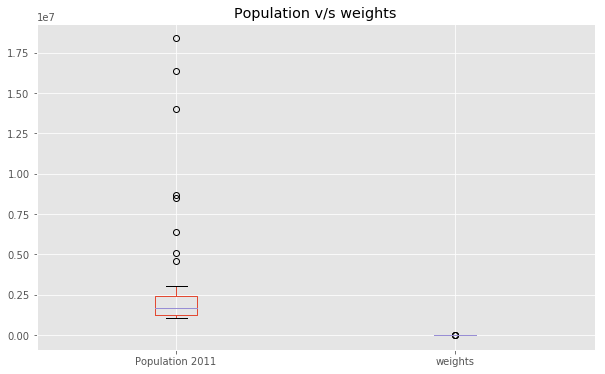

In [55]:
city_selection1.plot(kind='box', figsize=(10, 6))
plt.title('Population v/s weights')
plt.show()

The location weight is at high with average city population and the weight of the location is really low when the city population is either very high or low. This may be good information for future. Find below scatter plot.



Scatter plot Population v/s weights

The Scatter plot is updated here after calcualting the weights 

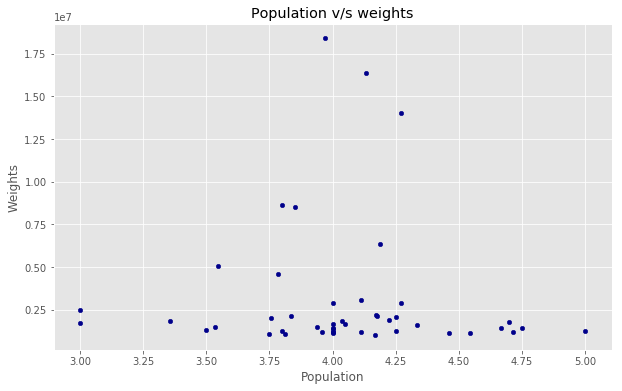

In [57]:
city_selection1.plot(kind='scatter', x='weights', y='Population 2011', figsize=(10, 6), color='darkblue')

plt.title('Population v/s weights')
plt.xlabel('Population')
plt.ylabel('Weights')

plt.show()

By visualization the Model selected City shows that the area covered by venues is large and almost all parts of Mumbai has good number of popular venues which makes it crucial to analyze the data and find best suitable place for eSports and Amusement Arcade

Map of Mumbai City by Venue Categories

Map of Mumbai is updated once the Venue Categories are found using Foursqaure API in the below sections 

In [74]:
# add all the venuew of the Mumbai city to the map as blue circle markers
for lat, lng, label in zip(venues_in_Mumbai['Venue Latitude'], venues_in_Mumbai['Venue Longitude'], venues_in_Mumbai['Venue']):
    label=folium.Popup(label,parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html = False).add_to(venues_map)
venues_map

In [104]:
# Four Square Credential were removed for final submission

In [105]:
CLIENT_ID = 'XXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXX' # your Foursquare Secret
VERSION = 'XXXX' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXX
CLIENT_SECRET:XXXX


Create a Function that extracts necessary columns into a data frame from the json files that we get when we search using four square API out of the values that we have in the data frame that we got from scraping multipe the web pages

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
       # print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
# Using he function get nearby venues for the details in dataframe 
radius=2000
df_venues = getNearbyVenues(names = df['City'], latitudes = df['Latitude'],longitudes = df['Longitude'])

In [38]:
# Print shape of dataframe venues and use head() function to have a glimplse of first 5 rows 
print(df_venues.shape)
df_venues.head()

(1557, 7)


,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mumbai,18.938771,72.835335,Royal China,18.938715,72.832933,Chinese Restaurant
1,Mumbai,18.938771,72.835335,Town House Cafe,18.938550,72.833464,Bar
2,Mumbai,18.938771,72.835335,Starbucks,18.932190,72.833959,Coffee Shop
3,Mumbai,18.938771,72.835335,Britannia & Co.,18.934683,72.840183,Parsi Restaurant
4,Mumbai,18.938771,72.835335,Sher-E-Punjab,18.937944,72.837853,Indian Restaurant


In [39]:
# Check last 5 rows in the datafrmae 
df_venues.tail()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1552,Tiruchirappalli,10.804973,78.686904,Vijay Cinemas,10.806983,78.681556,Multiplex
1553,Tiruchirappalli,10.804973,78.686904,Ezlam Suvai,10.801875,78.674540,Indian Restaurant
1554,Tiruchirappalli,10.804973,78.686904,Tiruchirappalli Railway Junction,10.794614,78.685623,Train Station
1555,Tiruchirappalli,10.804973,78.686904,Femina Shopping Mall,10.800096,78.681466,Shopping Mall
1556,Tiruchirappalli,10.804973,78.686904,Hotel Anjappar,10.795515,78.681276,Restaurant


In [40]:
# Find unique Venue Categories
uniques = df_venues['Venue Category'].unique()
print(uniques.shape)
uniques

(183,)


array(['Chinese Restaurant', 'Bar', 'Coffee Shop', 'Parsi Restaurant',
       'Indian Restaurant', 'Train Station', 'Bakery', 'Café',
       'Cricket Ground', 'Seafood Restaurant', 'Multiplex', 'Food Truck',
       'Clothing Store', 'Scenic Lookout', 'Ice Cream Shop',
       'Monument / Landmark', 'Athletics & Sports', 'Park', 'Art Gallery',
       'Bookstore', 'History Museum', 'Asian Restaurant',
       'Breakfast Spot', 'Gym / Fitness Center', 'Beach', 'Market',
       'Lounge', 'Boutique', 'Pizza Place', 'Deli / Bodega',
       'Dessert Shop', 'Italian Restaurant', 'Flea Market', 'Hotel',
       'Middle Eastern Restaurant', 'Pub', 'Gift Shop', 'Cheese Shop',
       'Fast Food Restaurant', 'Field', 'Mughlai Restaurant', 'Nightclub',
       'College Academic Building', 'Diner', 'New American Restaurant',
       'Gastropub', 'Music Store', 'Vegetarian / Vegan Restaurant',
       'Japanese Restaurant', 'Stadium', 'General Entertainment',
       'Restaurant', 'Mediterranean Restaurant',

#### Assig weights to the Venue categories  

In [41]:
k = df_venues.copy(deep = True)
weights_dict={'Chinese Restaurant':3, 'Bar':5, 'Coffee Shop':3, 'Parsi Restaurant':1,
       'Indian Restaurant':3, 'Train Station':2, 'Bakery':1, 'Café':5,
       'Cricket Ground':1, 'Seafood Restaurant':3, 'Multiplex':5, 'Food Truck':1,
       'Clothing Store':2, 'Scenic Lookout':4, 'Ice Cream Shop':3,
       'Monument / Landmark':5, 'Athletics & Sports':5, 'Park':3, 'Art Gallery':1,
       'Bookstore':2, 'History Museum':2, 'Asian Restaurant':3,
       'Breakfast Spot':2, 'Gym / Fitness Center':4, 'Beach':5, 'Market':5,
       'Lounge':5, 'Boutique':2, 'Pizza Place':5, 'Deli / Bodega':3,
       'Dessert Shop':4, 'Italian Restaurant':3, 'Flea Market':2, 'Hotel':5,
       'Middle Eastern Restaurant':2, 'Pub':5, 'Gift Shop':4, 'Cheese Shop':3,
       'Fast Food Restaurant':2, 'Field':1, 'Mughlai Restaurant':2, 'Nightclub':5,
       'College Academic Building':3, 'Diner':3, 'New American Restaurant':3,
       'Gastropub':5, 'Music Store':2, 'Vegetarian / Vegan Restaurant':3,
       'Japanese Restaurant':4, 'Stadium':5, 'General Entertainment':1,
       'Restaurant':2, 'Mediterranean Restaurant':3, 'Falafel Restaurant':4,
       'Cocktail Bar':5, 'Food & Drink Shop':1, 'Mosque':1,
       'Tibetan Restaurant':2, 'Hardware Store':3, 'Museum':4,
       'Paper / Office Supplies Store':5, 'Snack Place':1, 'Hostel':2,
       'Indian Chinese Restaurant':3, 'Food':4, 'Korean Restaurant':5, 'Motel':5,
       'Sandwich Place':2, 'Miscellaneous Shop':3, 'Light Rail Station':4,
       'Road':5, 'American Restaurant':1, 'Historic Site':2, 'Neighborhood':3,
       'Indian Sweet Shop':4, 'South Indian Restaurant':5, 'BBQ Joint':1,
       'Harbor / Marina':2, 'Pool':3, 'Thai Restaurant':4, 'Tea Room':5,
       'Military Base':1, 'Bengali Restaurant':2, 'Shoe Store':3,
       'Fried Chicken Joint':4, 'Dumpling Restaurant':5, 'Juice Bar':1, 'Plaza':2,
       'Beer Garden':3, 'River':1, 'Boat or Ferry':4, 'Steakhouse':5, 'Dhaba':1,
       'Platform':1, 'Video Store':2, 'Soccer Stadium':3, 'Movie Theater':4,
       'Department Store':5, 'Memorial Site':1, 'Shopping Mall':5,
       'French Restaurant':2, 'Capitol Building':3, 'Brewery':4, 'Burger Joint':4,
       'Racetrack':1, 'Cupcake Shop':2, 'Furniture / Home Store':3, 'Hotel Bar':5,
       'Hookah Bar':5, 'Afghan Restaurant':1, 'Golf Course':3,
       'Sushi Restaurant':2, 'Vietnamese Restaurant':3, 'Toy / Game Store':5,
       'Bubble Tea Shop':4, 'Concert Hall':3, 'Arcade':2, 'Art Museum':1,
       'Bed & Breakfast':5, 'Karnataka Restaurant':4, 'Electronics Store':3,
       'Gym':2, 'Wine Bar':5, 'Food Court':5, 'Theater':4, 'Smoke Shop':4,
       'Donut Shop':2, 'Bistro':2, 'Motorcycle Shop':1, 'Stationery Store':4,
       'Jewelry Store':1, 'Frozen Yogurt Shop':2, 'Maharashtrian Restaurant':3,
       'Convenience Store':1, 'Comfort Food Restaurant':2, 'Dairy Store':3,
       'Supermarket':4, 'Performing Arts Venue':5, 'Gas Station':1,
       'Indie Movie Theater':4, 'Indie Theater':3, 'Turkish Restaurant':2,
       'Zoo':1, 'Sculpture Garden':1, 'Resort':2, 'Moving Target':3, 'Toll Plaza':1,
       'ATM':1, 'Hot Dog Joint':3, 'Bus Station':5, 'Accessories Store':4,
       'Board Shop':3, "Women's Store":3, 'Travel & Transport':3,
       'Grocery Store':2, 'Cajun / Creole Restaurant':4, 'Playground':5,
       'Lighthouse':1, "Men's Store":4, 'Fabric Shop':3,
       'Multicuisine Indian Restaurant':3, 'Farmers Market':3, 'Spa':2,
       'Bowling Alley':5, 'Lake':1, 'Airport':4, 'Campground':3, 'Bus Stop':3,
       'Garden Center':1, 'Planetarium':4, 'City':3, 'Student Center':5,
       'Kids Store':4, 'Kerala Restaurant':3, 'Rajasthani Restaurant':4,
       'Persian Restaurant':2, 'Pharmacy':1, 'Track Stadium':3,
       'Fish & Chips Shop':2, 'Arts & Crafts Store':3, 'Business Service':3,
       'Organic Grocery':2, 'Australian Restaurant':3,}
data = df_venues['Venue Category']
allVenues = data

##### Update the weights to each venue in the dataframe list

In [42]:
weights = []
for i in allVenues:
    if i in weights_dict.keys():
        weights.append(weights_dict[i])
    else :
        weights.append(0)
df_venues['weights'] = weights;

df_venues.head(10)

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,weights
0,Mumbai,18.938771,72.835335,Royal China,18.938715,72.832933,Chinese Restaurant,3
1,Mumbai,18.938771,72.835335,Town House Cafe,18.938550,72.833464,Bar,5
2,Mumbai,18.938771,72.835335,Starbucks,18.932190,72.833959,Coffee Shop,3
3,Mumbai,18.938771,72.835335,Britannia & Co.,18.934683,72.840183,Parsi Restaurant,1
4,Mumbai,18.938771,72.835335,Sher-E-Punjab,18.937944,72.837853,Indian Restaurant,3
5,Mumbai,18.938771,72.835335,Chhatrapati Shivaji Maharaj Terminus,18.940297,72.835384,Train Station,2
6,Mumbai,18.938771,72.835335,Yazdani Bakery,18.933191,72.833591,Bakery,1
7,Mumbai,18.938771,72.835335,Food for Thought,18.932031,72.831667,Café,5
8,Mumbai,18.938771,72.835335,Wankhede Stadium,18.938792,72.825944,Cricket Ground,1
9,Mumbai,18.938771,72.835335,Pratap Lunch Home,18.933605,72.832854,Seafood Restaurant,3


In [43]:
# get the shape of the datafrae to understand the number of rows
df_venues.shape

(1557, 8)

In [44]:
# Dropping the rows that we are not giving any weight 
# The weights ranges from 1 to 5, less than 3 are dropped from the list
df_venues.drop(df_venues[df_venues.weights < 3.0].index, inplace=True)
df_venues.shape

(1109, 8)

Copy only the relevant columns like city and weights to group all the venues by city and calculating the means for each city

In [45]:
citywise_venues_weights = df_venues[['City','weights']].copy()
citywise_venues_weights_means = citywise_venues_weights.groupby(['City']).mean()
citywise_venues_weights_means = citywise_venues_weights_means.reset_index(drop=False)
print(citywise_venues_weights_means.shape)
citywise_venues_weights_means.head()

(48, 2)


,City,weights
0,Agra,4.700000
1,Ahmedabad,4.187500
2,Allahabad,4.714286
3,Amritsar,4.111111
4,Asansol,4.000000


In [47]:
# Check original dataframe df which will be merged with other details 
df.head()

,Rank,City,State or Union Teritory,Population 2011,Population 2001,Latitude,Longitude
0,1,Mumbai,Maharashtra,"18,394,912","16,434,386",18.938771,72.835335
1,2,Delhi,Delhi,"16,349,831","12,877,470",28.651718,77.221939
2,3,Kolkata,West Bengal,"14,035,959","13,205,697",22.567746,88.347602
3,4,Chennai,Tamil Nadu,"8,653,521","6,560,242",13.080172,80.283833
4,5,Bangalore,Karnataka,"8,520,435","5,701,446",12.979120,77.591300


In [49]:
# Assign weights to each City in the dataframe
city_selection = pd.merge(df, citywise_venues_weights_means, on='City')
city_selection = city_selection[['City','Population 2011','weights']].copy()
city_selection.head(20)

,City,Population 2011,weights
0,Mumbai,"18,394,912",3.971831
1,Delhi,"16,349,831",4.131148
2,Kolkata,"14,035,959",4.272727
3,Chennai,"8,653,521",3.800000
4,Bangalore,"8,520,435",3.851852
5,Hyderabad,"9,700,000[17]",4.111111
6,Ahmedabad,"6,361,084",4.187500
7,Pune,"5,057,709",3.545455
8,Surat,"4,591,246",3.785714
9,Jaipur,"3,046,163",4.111111


In [50]:
# Clean the Dataframe
# Preprocessing the population  column as we have to normalize these values
k = city_selection.copy(deep = True)
k['Population 2011'] = k['Population 2011'].str.replace(',','')
#k['Population 2011'] = k['Population 2011'].astype(float)
city_selection = k.copy(deep = True)
city_selection.head(20)

,City,Population 2011,weights
0,Mumbai,18394912,3.971831
1,Delhi,16349831,4.131148
2,Kolkata,14035959,4.272727
3,Chennai,8653521,3.800000
4,Bangalore,8520435,3.851852
5,Hyderabad,9700000[17],4.111111
6,Ahmedabad,6361084,4.187500
7,Pune,5057709,3.545455
8,Surat,4591246,3.785714
9,Jaipur,3046163,4.111111


Drop Hyderabad and Visakhapatnam rows as it contains [17] and [18] this affects calculations

In [51]:
city_selection.drop(city_selection.index[[17]],inplace=True)
city_selection.drop(city_selection.index[[5]],inplace=True)

Plot Box plot for Data Exploration on Population and Weights

In [53]:
# Creating new dataframe to create boxplot
city_selection1=city_selection
city_selection1['Population 2011']=city_selection1['Population 2011'].astype(np.int64)

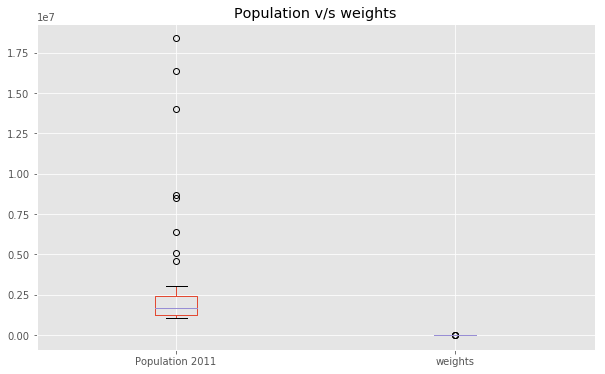

In [54]:
# Create Box plot
city_selection1.plot(kind='box', figsize=(10, 6))
plt.title('Population v/s weights')
plt.show()

Scatter  plot for Data Exploration on Population and Weights

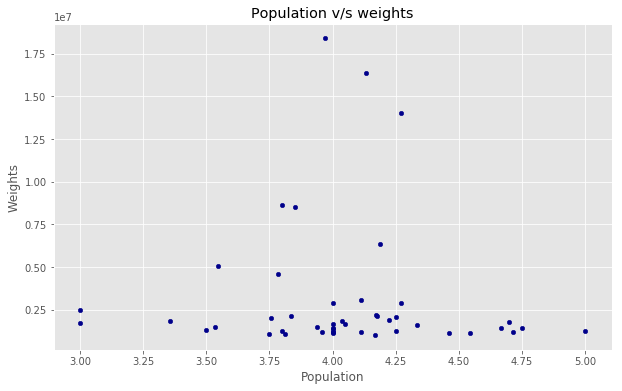

In [56]:
# Create scatter plot 
city_selection1.plot(kind='scatter', x='weights', y='Population 2011', figsize=(10, 6), color='darkblue')

plt.title('Population v/s weights')
plt.xlabel('Population')
plt.ylabel('Weights')

plt.show()

Normalizing the data frame values

In [58]:
# Normalizing the data frame
from sklearn import preprocessing
column_names_to_normalize1 = ['Population 2011', 'weights']
x = city_selection[column_names_to_normalize1].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
city_selection[column_names_to_normalize1] = pd.DataFrame(x_scaled)
city_selection.head()

,City,Population 2011,weights
0,Mumbai,1.000000,0.485915
1,Delhi,0.882280,0.565574
2,Kolkata,0.749087,0.636364
3,Chennai,0.439260,0.400000
4,Bangalore,0.431600,0.425926


calculating the sum of normalized population 2011 and weights for each city  to determine the city that has maximum sum and to use the highest value city as the city to search in details to find the best location to setup eSports and Amusement Arcade

In [59]:
#calculating the sum of normalized columns to determine the city that has maximum sum and conclude that one locality in that city would be the best fit 
city_selection['sum'] = city_selection['Population 2011'] + city_selection['weights']
row_num = city_selection['sum'].argmax()
city_name = city_selection['City'].iloc[row_num]
city_name

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  This is separate from the ipykernel package so we can avoid doing imports until


'Mumbai'

#### Mumbai as the hiest weight in terms of populationa and percapita income by state hence we will be using Mumbai City to search mvenues and venue categories in detail to find best place in Mumbai city for out project

In [61]:
# Finding the state in which that city belongs
row = df.loc[df['City']== city_name].index[0]
state_name = df['State or Union Teritory'].iloc[row]
state_name

'Maharashtra'

I was thinking that the state in which startup firm going to setup an arcade should've a percapital income of minimum of 150000 INR, let us check if that is the case with this

In [62]:
# checking the percapita income of Mumbai
p_row = df_state.loc[df_state['State or Union Teritory'] == state_name].index[0]
per_capital_income = df_state['Percapita Income'].iloc[p_row]
print("Per capita income of Mumbai is :", per_capital_income)

Per capita income of Mumbai is : ₹180,596 (equivalent to ₹190,000 or US$2,600 in 2018)


As we have concluded that we can choose one location in Mumbai city,it is considered as one of the best places to procced for setting up a eSports and Amusement arade arcade. we will go ahead to scrape moe details of Mumbai City and find best place to setup eSports and Amusement arcade

In [63]:
# Getting coordinates of Mumbai City
lat_Mumbai = df['Latitude'].iloc[row]
long_Mumbai = df['Longitude'].iloc[row]
print(lat_Mumbai, long_Mumbai)

18.9387711 72.8353355


#### write  a function to get all the venues in the Mumbai City and get the Venue detaisl such as Venue Category,Venue Latitude and Venue Longitude using Four square API and Location data

In [66]:
# Getting the venues of Mumbai City using four square API 

def getNearbyVenues1(name, latitudes, longitudes, radius):
    
    LIMIT = 250       
        # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitudes, 
            longitudes, 
            radius, 
            LIMIT)
            
        # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
   # print(results)
    venues_list=[]
    venues_list.append([(name,lat,lng,v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],v['venue']['categories'][0]['name'])for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 'Latitude', 'Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category']
    return(nearby_venues)


Mumbai_venues = getNearbyVenues1(name = 'Mumbai', latitudes = lat_Mumbai ,longitudes = long_Mumbai, radius = 4000)
Mumbai_venues.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mumbai,25.0,76.5,Royal China,18.938715,72.832933,Chinese Restaurant
1,Mumbai,25.0,76.5,Starbucks,18.932190,72.833959,Coffee Shop
2,Mumbai,25.0,76.5,Britannia & Co.,18.934683,72.840183,Parsi Restaurant
3,Mumbai,25.0,76.5,Food for Thought,18.932031,72.831667,Café
4,Mumbai,25.0,76.5,Yazdani Bakery,18.933191,72.833591,Bakery


####  Check the total number of venues found in the search ( Due to restriction max vnues will be 100 )

In [68]:
venues_in_Mumbai = Mumbai_venues.copy(deep = True)
venues_in_Mumbai.shape

(100, 7)

Since we have Venue 100 categories, we are now giving weights for each category for better results, we will use the same random weights used earlier for this purpose

In [69]:
# Copying the data frame in and giving weights for each category
k = Mumbai_venues.copy(deep = True)
new_weightage_dict={'Chinese Restaurant':3, 'Bar':5, 'Coffee Shop':3, 'Parsi Restaurant':1,
       'Indian Restaurant':3, 'Train Station':2, 'Bakery':1, 'Café':5,
       'Cricket Ground':1, 'Seafood Restaurant':3, 'Multiplex':5, 'Food Truck':1,
       'Clothing Store':2, 'Scenic Lookout':4, 'Ice Cream Shop':3,
       'Monument / Landmark':5, 'Athletics & Sports':5, 'Park':3, 'Art Gallery':1,
       'Bookstore':2, 'History Museum':2, 'Asian Restaurant':3,
       'Breakfast Spot':2, 'Gym / Fitness Center':4, 'Beach':5, 'Market':5,
       'Lounge':5, 'Boutique':2, 'Pizza Place':5, 'Deli / Bodega':3,
       'Dessert Shop':4, 'Italian Restaurant':3, 'Flea Market':2, 'Hotel':5,
       'Middle Eastern Restaurant':2, 'Pub':5, 'Gift Shop':4, 'Cheese Shop':3,
       'Fast Food Restaurant':2, 'Field':1, 'Mughlai Restaurant':2, 'Nightclub':5,
       'College Academic Building':3, 'Diner':3, 'New American Restaurant':3,
       'Gastropub':5, 'Music Store':2, 'Vegetarian / Vegan Restaurant':3,
       'Japanese Restaurant':4, 'Stadium':5, 'General Entertainment':1,
       'Restaurant':2, 'Mediterranean Restaurant':3, 'Falafel Restaurant':4,
       'Cocktail Bar':5, 'Food & Drink Shop':1, 'Mosque':1,
       'Tibetan Restaurant':2, 'Hardware Store':3, 'Museum':4,
       'Paper / Office Supplies Store':5, 'Snack Place':1, 'Hostel':2,
       'Indian Chinese Restaurant':3, 'Food':4, 'Korean Restaurant':5, 'Motel':5,
       'Sandwich Place':2, 'Miscellaneous Shop':3, 'Light Rail Station':4,
       'Road':5, 'American Restaurant':1, 'Historic Site':2, 'Neighborhood':3,
       'Indian Sweet Shop':4, 'South Indian Restaurant':5, 'BBQ Joint':1,
       'Harbor / Marina':2, 'Pool':3, 'Thai Restaurant':4, 'Tea Room':5,
       'Military Base':1, 'Bengali Restaurant':2, 'Shoe Store':3,
       'Fried Chicken Joint':4, 'Dumpling Restaurant':5, 'Juice Bar':1, 'Plaza':2,
       'Beer Garden':3, 'River':1, 'Boat or Ferry':4, 'Steakhouse':5, 'Dhaba':1,
       'Platform':1, 'Video Store':2, 'Soccer Stadium':3, 'Movie Theater':4,
       'Department Store':5, 'Memorial Site':1, 'Shopping Mall':5,
       'French Restaurant':2, 'Capitol Building':3, 'Brewery':4, 'Burger Joint':4,
       'Racetrack':1, 'Cupcake Shop':2, 'Furniture / Home Store':3, 'Hotel Bar':5,
       'Hookah Bar':5, 'Afghan Restaurant':1, 'Golf Course':3,
       'Sushi Restaurant':2, 'Vietnamese Restaurant':3, 'Toy / Game Store':5,
       'Bubble Tea Shop':4, 'Concert Hall':3, 'Arcade':2, 'Art Museum':1,
       'Bed & Breakfast':5, 'Karnataka Restaurant':4, 'Electronics Store':3,
       'Gym':2, 'Wine Bar':5, 'Food Court':5, 'Theater':4, 'Smoke Shop':4,
       'Donut Shop':2, 'Bistro':2, 'Motorcycle Shop':1, 'Stationery Store':4,
       'Jewelry Store':1, 'Frozen Yogurt Shop':2, 'Maharashtrian Restaurant':3,
       'Convenience Store':1, 'Comfort Food Restaurant':2, 'Dairy Store':3,
       'Supermarket':4, 'Performing Arts Venue':5, 'Gas Station':1,
       'Indie Movie Theater':4, 'Indie Theater':3, 'Turkish Restaurant':2,
       'Zoo':1, 'Sculpture Garden':1, 'Resort':2, 'Moving Target':3, 'Toll Plaza':1,
       'ATM':1, 'Hot Dog Joint':3, 'Bus Station':5, 'Accessories Store':4,
       'Board Shop':3, "Women's Store":3, 'Travel & Transport':3,
       'Grocery Store':2, 'Cajun / Creole Restaurant':4, 'Playground':5,
       'Lighthouse':1, "Men's Store":4, 'Fabric Shop':3,
       'Multicuisine Indian Restaurant':3, 'Farmers Market':3, 'Spa':2,
       'Bowling Alley':5, 'Lake':1, 'Airport':4, 'Campground':3, 'Bus Stop':3,
       'Garden Center':1, 'Planetarium':4, 'City':3, 'Student Center':5,
       'Kids Store':4, 'Kerala Restaurant':3, 'Rajasthani Restaurant':4,
       'Persian Restaurant':2, 'Pharmacy':1, 'Track Stadium':3,
       'Fish & Chips Shop':2, 'Arts & Crafts Store':3, 'Business Service':3,
       'Organic Grocery':2, 'Australian Restaurant':3,}


#### Plot  the venues that we have got from the Four Square AP locstion data search

In [72]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

# create map of the venues that we have using latitude and longitudes
venues_map = folium.Map(location=[lat_Mumbai, long_Mumbai], zoom_start=15) # generate map centred around Jersey city


# add Mumbai City as a red circle mark
folium.features.CircleMarker(
    [lat_Mumbai, long_Mumbai],
    radius=10,
    popup='Mumbai City',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

In [73]:
# add all the venuew of the Mumbai city to the map as blue circle markers
for lat, lng, label in zip(venues_in_Mumbai['Venue Latitude'], venues_in_Mumbai['Venue Longitude'], venues_in_Mumbai['Venue']):
    label=folium.Popup(label,parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.6,
        parse_html = False).add_to(venues_map)
venues_map

#### Assigning weights to each category, same as we gave for each city

In [75]:
# Calculating new weights for our data frame as we have given weights for all categories

allVenuesinCity1 = k['Venue Category']

f_weights1 = []
for i in allVenuesinCity1:
    if i in new_weightage_dict.keys():
        f_weights1.append(new_weightage_dict[i])
    else :
        f_weights1.append(0)
k['weights'] = f_weights1;
k.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,weights
0,Mumbai,25.0,76.5,Royal China,18.938715,72.832933,Chinese Restaurant,3
1,Mumbai,25.0,76.5,Starbucks,18.932190,72.833959,Coffee Shop,3
2,Mumbai,25.0,76.5,Britannia & Co.,18.934683,72.840183,Parsi Restaurant,1
3,Mumbai,25.0,76.5,Food for Thought,18.932031,72.831667,Café,5
4,Mumbai,25.0,76.5,Yazdani Bakery,18.933191,72.833591,Bakery,1


In [77]:
# Dropping unnecessary columns at this stage of the project as we need only Venue related etails
newframe = k[['City','Venue Category','weights']].copy()
newframe = k.groupby(['Venue Category']).mean()
newframe.drop(columns = ["Latitude", "Longitude"], inplace = True)
newframe.head()

,Venue Latitude,Venue Longitude,weights
Venue Category,,,
Art Gallery,18.927606,72.831464,1
Asian Restaurant,18.925523,72.832190,3
Athletics & Sports,18.937691,72.830976,5
BBQ Joint,18.954751,72.833198,1
Bakery,18.938095,72.830850,1


# 4.	Predictive Modeling

There are many methods and algorithms to predict or find required results based on the problem to be solved, Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields

For this project considering the problem statement and desired output clustering technique will be used to solve the problem.


## 4.1.	Applying Algorithm

There are many models for clustering out there. In this project, we will be presenting the model that is considered the one of the simplest models among them. Despite its simplicity, k-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.
Some real-world applications of k-means include:
-  customer segmentation,
•  understand what the visitors of a website are trying to accomplish,
•  pattern recognition, and,
•  data compression.


##### Use K Means algorithm to cluster the venues and calculating the weights for each cluster to decide which cluster would be the best area to install a gaming arcade

In [78]:
# Cluster them using K means algorithm 
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
#Standardize
clmns = ['weights','Venue Latitude', 'Venue Longitude']
df_tr_std = stats.zscore(newframe[clmns])
#Cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_tr_std)
labels = kmeans.labels_
newframe['clusters'] = labels
#Add the column into our list
clmns.extend(['clusters'])
#Lets analyze the clusters
kframe = newframe[clmns].groupby(['Venue Category']).mean()
kframe = kframe.reset_index(drop = False)
kframe.head()

,Venue Category,weights,Venue Latitude,Venue Longitude,clusters
0,Art Gallery,1,18.927606,72.831464,1
1,Asian Restaurant,3,18.925523,72.832190,2
2,Athletics & Sports,5,18.937691,72.830976,0
3,BBQ Joint,1,18.954751,72.833198,4
4,Bakery,1,18.938095,72.830850,1


In [79]:
# Get the Latitude and Longitude for the cluster venue category with highest weight
kclusters=5
latitude = 18.937691
longitude = 72.830976

In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kframe['Venue Latitude'], kframe['Venue Longitude'], kframe['Venue Category'], kframe['clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-0],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

##### Examine each cluster venue categories and and its weights for better understanding of the cluster location and use the knowledge to setup eSports and Amusement arcade

In [81]:
kframe.loc[kframe['clusters'] == 1, kframe.columns[[0] + list(range(5, kframe.shape[1]))]]

,Venue Category
0,Art Gallery
4,Bakery
7,Bookstore
11,Chaat Place
17,Cricket Ground
22,Field
23,Flea Market
26,General Entertainment


In [82]:
kframe.loc[kframe['clusters'] == 2, kframe.columns[[0] + list(range(5, kframe.shape[1]))]]

,Venue Category
1,Asian Restaurant
8,Boutique
9,Breakfast Spot
13,Chinese Restaurant
14,Clothing Store
16,Coffee Shop
18,Deli / Bodega
27,History Museum
30,Indian Restaurant
39,Mughlai Restaurant


In [83]:
kframe.loc[kframe['clusters'] == 3, kframe.columns[[0] + list(range(5, kframe.shape[1]))]]

,Venue Category
6,Beach
20,Diner
25,Gastropub
28,Hotel
29,Ice Cream Shop
31,Italian Restaurant
35,Mediterranean Restaurant
38,Movie Theater
45,Performing Arts Venue
49,Scenic Lookout


In [84]:
kframe.loc[kframe['clusters'] == 4, kframe.columns[[0] + list(range(5, kframe.shape[1]))]]

,Venue Category
3,BBQ Joint
12,Cheese Shop
24,Food Truck
34,Market
36,Middle Eastern Restaurant
48,Restaurant
53,Train Station


#### Find the best location among these 5 clusters, find the weights for each cluster by taking average of each clusters, find the average of each cluster using venue categories weight.

In [86]:
#new group by clusters and add weights of each cluster 
finalWeight = kframe.groupby(['clusters']).mean()
finalWeight

,weights,Venue Latitude,Venue Longitude
clusters,,,
0,4.785714,18.926897,72.831421
1,1.125000,18.932711,72.828333
2,2.533333,18.929318,72.833482
3,4.000000,18.930057,72.823789
4,2.285714,18.946974,72.834223


#### Cluster 1 (Index 0) has heighest weights among all the 5 clusters with weight 4.785714

In [88]:
# Get the Final coordinates of the place
lat1 = 18.926897
long1 = 72.831421

##### As we have a location with the maximum weight, let us plot the same in the graph with a circle of radius 50M 

In [90]:
# create map of the venues that we have using latitude and longitudes
final_map = folium.Map(location=[lat1, long1], zoom_start=15) # generate map centred around Jersey city


# add prefered location in the City as a green circle mark
folium.features.CircleMarker(
    [lat1, long1],
    radius=50,
    popup='eSports & Amusement arcade can be installed within this circle',
    fill=True,
    color='green',
    fill_color='green',
    fill_opacity=0.6
    ).add_to(final_map)
final_map

# 4.2.	Solution & the problems

# 4.3	Result

In [96]:
#!pip install reverse_geocoder
#!pip install pprint

# Python3 program for reverse geocoding. 
  
# importing necessary libraries 
import reverse_geocoder as rg 
import pprint 

In [103]:
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  
  
# Driver function 
if __name__=="__main__": 
      
    # Coorinates tuple.Can contain more than one pair. 
    coordinates =(18.9268,72.8314) 
      
    reverseGeocode(coordinates)


[OrderedDict([('lat', '18.87813'),
              ('lon', '72.93924'),
              ('name', 'Uran'),
              ('admin1', 'Maharashtra'),
              ('admin2', 'Raigarh'),
              ('cc', 'IN')])]


The best location to setup eSports & Amusement arcade is found based on the cluster’s weights. 

The cluster weights are found by taking the average of all Venue categories’ weight in the respective clusters.

The new eSports & Amusement arcade can be setup within 2 kilometers radius for geo coordinates (18.9268,72.8314) location in Mumbai City 


# 5.	 Conclusion 

So, we finally got a better place in the Mumbai City

In this study I analyzed various cities in India and several states,the features like city population, per capita income for each state, geographical locations, Venues categories people most visit  are considered along with randomly assigned weight for each venue category. 

K means clustering machine learning technique is used to find the final location in the Mumbai city 

Based on the problem statement Mumbai city has been found as the best city to setup eSports & Amusement Arcade, a location within Mumbai city is found using the clusters and average weight of clusters.

The K means clustering technique  is very useful in identifying locations similarly for various other cities.   

# 6.	 Discussion & Future Directions

The K means clustering model works mainly based on the features selected and the number of clusters used.

It is possible to use the foursquare API radius with bigger radius search to find more venues and categories.

Also, more features can be added based on the data and its available source.

In the Four-Square API, we have queried the Venues of a locality by specifying the LIMIT and Radius of our choice.

We have chosen less LIMIT as the number of API calls that can be done using a free account in Four Square is limited.

We can increase the limit for more accurate results. 

